<a href="https://colab.research.google.com/github/ankit-rathi/Tradevesting_v2/blob/main/myStocks_Portfolio_Analysis_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pyxirr

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 546.7/546.7 kB 6.1 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
from google.colab import drive
drive.mount('/content/drive')
import os
project_path = '/content/drive/My Drive/tradevesting'
os.chdir(project_path)

import warnings
warnings.filterwarnings('ignore')

from google.colab import data_table

Mounted at /content/drive


Run date time (IST): 2024-11-28 09:41:02
-------------------
qualified stocks: 85
with latest results: 81
still star stocks: 39
-------------------
Initial Investment:  1.00 C
CY Investment:  1.13 C
Reserve:  2.66 L
Current:  1.18 C
-------------------
Today PnL: 82.59 K (0.7%)
Current PnL: -4.64 L (-4.09%)
CY Booked + Current PnL: 4.96 L (4.38%)
-------------------
Total profit:  7.18 L
Total loss:  -11.81 L
-------------------
Total Booked + Current PnL: 18.07 L (18.05%)
Total Booked PnL: 22.71 L (22.68%)
Curr Year Booked PnL: 9.60 L (8.1%)
Prev Year Booked PnL: 13.11 L (13.09%)
Est FTT:  1.93 C
Est FTT PnL: 74.13 L (62.58%)
-------------------
Est LTT:  2.44 C
Est LTT PnL: 1.25 C (105.66%)
Deployed:  1.00 C
Current:  1.18 C
CAGR/XIRR %: 15.76%


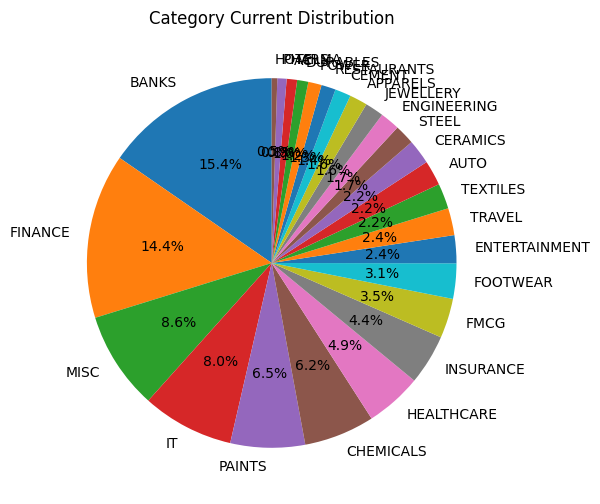

In [ ]:
# Import the function from the script
import myStocks_Portfolio_Analysis_v2

# Call the function to get the DataFrame
df_portfolio_features = myStocks_Portfolio_Analysis_v2.get_portfolio_features_v2()
cols = ['Symbol', 'AvgCost', 'Close', 'FTT', 'Dev%_PE', 'RSP', 'Current', 'Current P/L', 'FTT Amt', 'Today P/L%', 'Current P/L%', 'FTT%', 'OTT%', 'XIRR', 'RRR Ind', 'CurrAlloc%', 'Gained%', 'Criteria', 'Strategy', 'Category']
df_portfolio_features = df_portfolio_features[cols]

In [ ]:
# all portfolio
df_portfolio_features = df_portfolio_features.sort_values(by = 'FTT Amt', ascending=True)
data_table.DataTable(df_portfolio_features, include_index=False)

,Symbol,AvgCost,Close,FTT,Dev%_PE,RSP,Current,Current P/L,FTT Amt,Today P/L%,Current P/L%,FTT%,OTT%,XIRR,RRR Ind,CurrAlloc%,Gained%,Criteria,Strategy,Category
75,TCS,4073.44,4298.30,4998.00,9.29,82.35,103159.0,5396.0,16794.0,-0.79,5.52,16.28,22.70,15.0,0.32,0.89,25.02,X40,BTT,IT
48,LTIM,5051.49,6172.00,7262.39,24.92,77.65,98752.0,17928.0,17449.0,-1.43,22.18,17.67,43.77,12.0,1.03,0.85,36.02,X200,ATH,IT
46,LALPATHLAB,2519.90,3024.55,3689.00,-6.47,36.47,108884.0,18168.0,23922.0,-0.24,20.03,21.97,46.39,26.0,0.76,0.94,51.29,X40N,NTT,HEALTHCARE
40,JIOFIN,320.24,328.90,387.00,-5.38,75.29,162477.0,4278.0,28693.0,0.00,2.70,17.66,20.85,85.0,0.15,1.40,45.85,XSP,BTT,FINANCE
53,PAGEIND,38829.08,45175.00,52350.84,9.55,91.76,180700.0,25384.0,28695.0,0.45,16.34,15.88,34.82,11.0,0.88,1.56,38.13,X40,ATH,APPARELS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18,CAMPUS,294.86,279.90,631.85,7.57,48.24,159263.0,-8512.0,200257.0,0.97,-5.07,125.74,114.29,-31.0,-0.04,1.38,30.49,XSP,ATH,FOOTWEAR
57,RBLBANK,230.61,159.40,388.00,-46.53,21.18,161950.0,-72350.0,232252.0,0.85,-30.88,143.41,68.25,-60.0,-0.31,1.40,4.79,XSP,NTT,BANKS
11,BANDHANBNK,217.54,172.85,400.00,-39.60,14.12,189616.0,-49025.0,249174.0,0.89,-20.54,131.41,83.87,-24.0,-0.20,1.64,4.69,XSP,NTT,BANKS
73,TANLA,991.56,712.45,2007.31,-40.47,32.94,157451.0,-61684.0,286167.0,1.14,-28.15,181.75,102.44,-33.0,-0.22,1.36,5.16,AR,ATH,IT


In [ ]:
# lower current allocation with minimal upside
tmp_df = df_portfolio_features[(df_portfolio_features['CurrAlloc%'] < 1) ]
data_table.DataTable(tmp_df, include_index=False)

,Symbol,AvgCost,Close,FTT,Dev%_PE,RSP,Current,Current P/L,FTT Amt,Today P/L%,Current P/L%,FTT%,OTT%,XIRR,RRR Ind,CurrAlloc%,Gained%,Criteria,Strategy,Category
75,TCS,4073.44,4298.30,4998.00,9.29,82.35,103159.0,5396.0,16794.0,-0.79,5.52,16.28,22.70,15.0,0.32,0.89,25.02,X40,BTT,IT
48,LTIM,5051.49,6172.00,7262.39,24.92,77.65,98752.0,17928.0,17449.0,-1.43,22.18,17.67,43.77,12.0,1.03,0.85,36.02,X200,ATH,IT
46,LALPATHLAB,2519.90,3024.55,3689.00,-6.47,36.47,108884.0,18168.0,23922.0,-0.24,20.03,21.97,46.39,26.0,0.76,0.94,51.29,X40N,NTT,HEALTHCARE
25,FINEORG,4771.46,5228.15,7168.71,4.19,97.65,88879.0,7764.0,32992.0,1.29,9.57,37.12,50.24,-1.0,0.24,0.77,29.81,X40N,ATH,CHEMICALS
22,DABUR,523.35,528.75,735.00,-10.03,27.06,92531.0,945.0,36096.0,0.24,1.03,39.01,40.44,-3.0,0.03,0.80,7.79,X40,BTT,FMCG
79,TTKPRESTIG,769.29,861.70,1149.24,24.74,55.29,112883.0,12106.0,37669.0,-1.28,12.01,33.37,49.39,16.0,0.32,0.97,29.66,X40N,ATH,DURABLES
15,BAYERCROP,4346.57,5760.00,8325.00,11.17,10.59,92160.0,22615.0,41039.0,0.93,32.52,44.53,91.53,20.0,0.55,0.80,17.99,X40N,BTT,CHEMICALS
84,VIPIND,488.80,500.65,718.00,NaN,85.88,97627.0,2311.0,42380.0,1.16,2.42,43.41,46.89,-25.0,0.05,0.84,15.86,X40N,NTT,MISC
17,BSOFT,628.85,598.20,844.81,7.56,76.47,104685.0,-5364.0,43162.0,-0.41,-4.87,41.23,34.34,-40.0,-0.12,0.90,9.68,XR,ATH,IT
36,INDUSINDBK,1354.50,1009.60,1800.00,-43.25,23.53,57547.0,-19660.0,45054.0,0.76,-25.46,78.29,32.89,-20.0,-0.44,0.50,2.87,XR,NTT,BANKS


In [ ]:
# XSP allocation
tmp_df = df_portfolio_features[(df_portfolio_features['Criteria'] == 'XSP') ]
data_table.DataTable(tmp_df, include_index=False)

,Symbol,AvgCost,Close,FTT,Dev%_PE,RSP,Current,Current P/L,FTT Amt,Today P/L%,Current P/L%,FTT%,OTT%,XIRR,RRR Ind,CurrAlloc%,Gained%,Criteria,Strategy,Category
40,JIOFIN,320.24,328.90,387.00,-5.38,75.29,162477.0,4278.0,28693.0,0.00,2.70,17.66,20.85,85.0,0.15,1.40,45.85,XSP,BTT,FINANCE
81,UNIONBANK,123.87,123.42,163.00,-3.37,92.94,140329.0,-511.0,45004.0,0.44,-0.36,32.07,31.59,-35.0,-0.01,1.21,17.46,XSP,NTT,BANKS
77,TITAGARH,1117.46,1219.05,1548.00,17.92,90.59,198705.0,16559.0,53611.0,1.43,9.09,26.98,38.53,-4.0,0.31,1.72,48.05,XSP,NTT,ENGINEERING
44,KANSAINER,299.63,276.85,340.00,-40.84,35.29,249165.0,-20502.0,56835.0,0.53,-7.60,22.81,13.47,-28.0,-0.36,2.15,8.38,XSP,NTT,PAINTS
16,BERGEPAINT,558.54,492.25,680.00,-35.00,11.76,156043.0,-21014.0,59515.0,0.39,-11.87,38.14,21.75,-16.0,-0.35,1.35,8.71,XSP,NTT,PAINTS
55,QUESS,711.66,698.95,986.00,-16.29,56.47,153070.0,-2784.0,62866.0,1.04,-1.79,41.07,38.55,-28.0,-0.04,1.32,49.49,XSP,NTT,MISC
51,MEDANTA,1022.60,1071.75,1486.00,-4.94,54.12,162906.0,7471.0,62963.0,-0.45,4.81,38.65,45.32,60.0,0.12,1.41,16.51,XSP,NTT,HEALTHCARE
42,JPPOWER,18.73,17.83,26.20,-63.62,47.06,135027.0,-6815.0,63382.0,2.65,-4.80,46.94,39.88,79.0,-0.11,1.17,38.75,XSP,NTT,POWER
7,ATULAUTO,624.44,575.00,844.00,NaN,63.53,135700.0,-11668.0,63480.0,0.95,-7.92,46.78,35.16,-64.0,-0.18,1.17,20.87,XSP,NTT,AUTO
38,IRCTC,904.87,825.50,1269.00,-20.02,62.35,128778.0,-12382.0,69192.0,0.35,-8.77,53.73,40.24,15.0,-0.18,1.11,18.94,XSP,BTT,TRAVEL


In [ ]:
# Top N allocation
df_tmp = df_portfolio_features.sort_values(by = 'CurrAlloc%', ascending=False)
top_n_values = [10, 20, 30]

sum_df = pd.DataFrame({
    'Top_N': top_n_values,
    'Sum_Alloc%': [df_tmp['CurrAlloc%'].head(n).sum() for n in top_n_values]
})

sum_df

,Top_N,Sum_Alloc%
0,10,20.00
1,20,35.39
2,30,49.35


In [ ]:
# criteria-wise allocation
df_portfolio_features.groupby('Criteria')['CurrAlloc%'].sum().sort_values(ascending=False)

,CurrAlloc%
Criteria,
XSP,38.85
X40,20.46
XR,16.81
X40N,15.79
AR,5.68
SR,1.58
X200,0.85


In [ ]:
# sector-wise stats
df_tmp = df_portfolio_features.groupby('Category')[['CurrAlloc%', 'Current', 'Current P/L', 'FTT Amt']].sum().sort_values(by=['Current', 'Current P/L'], ascending=False)
df_tmp['Current P/L%'] = round(df_tmp['Current P/L'] * 100 / df_tmp['Current'], 2)
df_tmp['FTT%'] = round(df_tmp['FTT Amt'] * 100 / df_tmp['Current'], 2)
cols = ['CurrAlloc%', 'Current P/L%', 'FTT%']
df_tmp[cols].sort_values(by=['CurrAlloc%'], ascending=False)

,CurrAlloc%,Current P/L%,FTT%
Category,,,
BANKS,15.39,-7.21,64.84
FINANCE,14.42,-3.70,57.99
MISC,8.57,-2.17,55.77
IT,8.02,-3.18,63.14
PAINTS,6.52,-8.94,41.18
CHEMICALS,6.19,-1.33,67.30
HEALTHCARE,4.94,8.83,38.78
INSURANCE,4.39,4.90,46.41
FMCG,3.47,-4.82,44.52
